In [1]:
# Plot Graph
import matplotlib.pyplot as plt
import pandas as pd

def plot_accuracy(results):
    # Create a DataFrame from the results
    df = pd.DataFrame(results)

    # Set up the plot
    plt.figure(figsize=(12, 6))

    # Loop through unique models and plot their accuracy
    for model in df['model'].unique():
        subset = df[df['model'] == model]
        plt.plot(subset['dataset'], subset['accuracy'], marker='o', label=model)

        # Annotate each point with its accuracy value
        for i, row in subset.iterrows():
            plt.text(row['dataset'], row['accuracy'] + 1, f"{row['accuracy']:.2f}%", 
                     ha='center', va='bottom',fontsize=12, color='green')  # Position the text above the point

            # Show training and testing time as a separate text annotation
            time_text = f"Train: {row['train_time']:.4f}s\nTest: {row['test_time']:.4f}s"
            plt.text(row['dataset'], row['accuracy'] - 5, time_text, 
                     ha='center', va='bottom', fontsize=8, color='red')  # Position the text below the point

    # Adding titles and labels
    plt.title('Accuracy and Time across Different Datasets\n\n')
    plt.xlabel('Datasets')
    plt.ylabel('Accuracy (%)')
    plt.xticks(rotation=45)
    plt.ylim(0, 110)  # Set y-axis limits to 0 - 100
    plt.legend(title='Model')
    plt.grid()

    # Show the plot
    plt.tight_layout()
    plt.show()


In [2]:
# DATASETS
datasets = [
    'C:/Users/Natty PC/Documents/Party/Project II/PreData/Signatures/signatures-5mins.csv',
    # 'C:/Users/Natty PC/Documents/Party/Project II/PreData/Signatures/signatures-15mins.csv',
    # 'C:/Users/Natty PC/Documents/Party/Project II/PreData/Signatures/signatures-30mins.csv',
    # 'C:/Users/Natty PC/Documents/Party/Project II/PreData/Signatures/signatures-1hour.csv',
    # 'C:/Users/Natty PC/Documents/Party/Project II/PreData/Signatures/signatures-2hours.csv',
    # 'C:/Users/Natty PC/Documents/Party/Project II/PreData/Signatures/signatures-4hours.csv',
    # 'C:/Users/Natty PC/Documents/Party/Project II/PreData/Signatures/signatures-8hours.csv'
]

In [3]:
# DATA Preprocessing
import os
os.environ["PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION"] = "python"

# Imports
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Example data setup
# Assuming you have some data to load and preprocess, here's a placeholder
# Replace this part with your actual dataset
data = pd.DataFrame({
    'feature1': np.random.rand(100),
    'feature2': np.random.rand(100),
    'label': np.random.randint(0, 2, 100)
})

# Label encoding for categorical labels (assuming binary classification)
encoder = LabelEncoder()
data['label'] = encoder.fit_transform(data['label'])

# Splitting data into train and test sets
X = data[['feature1', 'feature2']].values
y = to_categorical(data['label'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshaping input data to 3D format for LSTM [samples, time steps, features]
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Building an LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))  # Assuming binary classification

# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluating the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')


AttributeError: module 'tensorflow.core.framework.types_pb2' has no attribute 'SerializedDType'

In [4]:
# Creating LSTM Model
def create_lstm_model(input_shape, num_classes):
    model = Sequential()
    model.add(LSTM(64, input_shape=input_shape, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(32))
    model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='softmax'))  # Output layer for classification
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
# Training and Test Model
import time

results = []

for dataset in datasets:
    print(f"\nDataset: {dataset}")

    # Load and preprocess the dataset
    X_train, X_test, y_train, y_test, signature_list, label_encoder = load_and_preprocess_data_lstm(dataset)

    # Create the LSTM model
    input_shape = (X_train.shape[1], X_train.shape[2])  # (timesteps, features)
    num_classes = y_train.shape[1]  # Number of unique classes
    model = create_lstm_model(input_shape, num_classes)

    # Train the model
    start_train_time = time.time()  # Start timing the training
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))
    end_train_time = time.time()  # End timing the training

    # Evaluate the model
    start_test_time = time.time()  # Start timing the testing
    loss, accuracy = model.evaluate(X_test, y_test)
    end_test_time = time.time()  # End timing the testing

    # Print the timing results
    print(f"Test Accuracy: {accuracy * 100:.2f}%")
    print(f"Training Time: {end_train_time - start_train_time:.4f}s")
    print(f"Testing Time: {end_test_time - start_test_time:.4f}s")

    # Store results for plotting
    results.append({
        'dataset': dataset.split('/')[-1],  # Get just the dataset name
        'model': 'LSTM',
        'accuracy': accuracy * 100,
        'train_time': end_train_time - start_train_time,
        'test_time': end_test_time - start_test_time
    })
    
# Optionally, plot results using the previously defined plot_accuracy function
plot_accuracy(results)


In [ ]:
# Print the results for validation
print("X_train matrix:")
print(X_train)
print("\nX_test matrix:")
print(X_test)
print("\ny_train labels (encoded):")
print(y_train)
print("\ny_test labels (encoded):")
print(y_test)
print("\nUnique signatures (features):")
print(signature_list)
print("\nLabel classes (mapping):")
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

Bi-LSTM

Initial Memory Usage: 242448.00 KiB
Training Time: 1.4157063961 seconds
Testing Time: 1.4058849812 seconds
Test Accuracy: 100.00%
Memory Consumption During Testing: 242880.00 KiB
Memory Usage: 432.00 KiB

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        53
           2       1.00      1.00      1.00        54
           3       1.00      1.00      1.00        61
           4       1.00      1.00      1.00        66
           5       1.00      1.00      1.00        56

    accuracy                           1.00       290
   macro avg       1.00      1.00      1.00       290
weighted avg       1.00      1.00      1.00       290



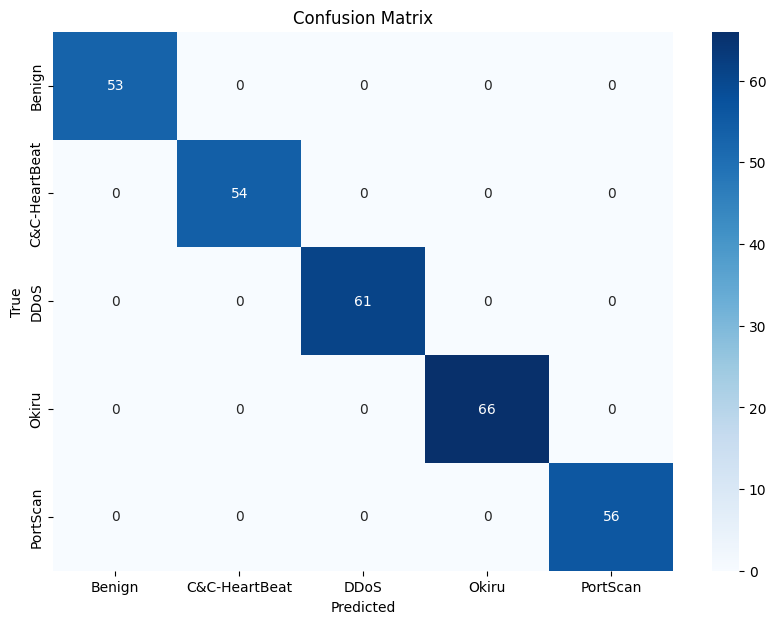

In [9]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time
import matplotlib.pyplot as plt
import seaborn as sns
from memory_profiler import memory_usage

# Function to extract signature and frequency from a cell
def extract_signature_and_frequency(cell):
    if isinstance(cell, str):
        try:
            # Split by comma and remove brackets to extract signature and frequency
            signature, frequency = cell.replace('[', '').replace(']', '').split(',')
            return signature.strip(), int(frequency.strip())
        except ValueError:
            return None, 0  # In case of parsing failure, return None and 0 frequency
    return None, 0

# Function to load and preprocess dataset
def load_and_preprocess_data(dataset):
    # Load the dataset
    data = pd.read_csv(dataset)

    # Extract all columns that start with 'Fs'
    fs_columns = [col for col in data.columns if col.startswith('Fs')]

    # Create a set to collect unique signatures
    signature_set = set()
    for col in fs_columns:
        # Apply extraction function to each cell in the 'Fs' columns
        data[col] = data[col].apply(lambda cell: extract_signature_and_frequency(cell))
        # Update signature_set with signatures (ignore None)
        signature_set.update([sig for sig, _ in data[col] if sig])

    # Sort the unique signatures to create a consistent order for columns
    signature_list = sorted(list(signature_set))

    # Initialize the matrix with zeros as integers; rows = samples, columns = unique signatures
    X_matrix = np.zeros((data.shape[0], len(signature_list)), dtype=int)

    # Populate the matrix with frequencies
    for row_idx in range(data.shape[0]):
        for col in fs_columns:
            signature, frequency = data.at[row_idx, col]
            if signature in signature_list:
                sig_idx = signature_list.index(signature)  # Get the index for the signature
                X_matrix[row_idx, sig_idx] += frequency  # Update the corresponding cell with the frequency

    # Extract Y labels
    y = data['Label']
    
    # Encode Y labels into unique integers
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)

    # Handle NaN or infinite values in X_matrix
    X_matrix = np.nan_to_num(X_matrix)  # Convert NaN to 0 and ignore inf values

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_matrix, y_encoded, test_size=0.2, random_state=42)

    return X_train, X_test, y_train, y_test, signature_list, label_encoder

# Function to train and evaluate the Decision Tree model
def train_and_evaluate_model(X_train, X_test, y_train, y_test, initial_mem_usage_kib):
    # Initialize the Decision Tree Classifier
    clf = DecisionTreeClassifier(random_state=42)

    # Start timing the training process
    start_time = time.time()
    
    # Measure memory usage during training
    mem_usage_train = memory_usage((clf.fit, (X_train, y_train), {}), interval=0.1, timeout=1)
    
    # Calculate training time
    training_time = time.time() - start_time

    # Start timing the prediction process
    start_testing_time = time.time()
    
    # Measure memory usage during testing
    mem_usage_test = memory_usage((clf.predict, (X_test,), {}), interval=0.1, timeout=1)
    
    testing_time = time.time() - start_testing_time  # Calculate testing time

    testing_time2 = testing_time - training_time
    # Calculate accuracy
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)


    # Display the results
    print(f"Training Time: {training_time:.10f} seconds")
    print(f"Testing Time: {testing_time:.10f} seconds")
    print(f"Test Accuracy: {accuracy * 100:.2f}%")
    
    # Show memory consumption in KiB
    max_mem_usage_test_kib = max(mem_usage_test) * 1024
    print(f"Memory Consumption During Testing: {max_mem_usage_test_kib:.2f} KiB")
    
    # Calculate memory difference
    memory_diff_test = max_mem_usage_test_kib - initial_mem_usage_kib
    print(f"Memory Usage: {memory_diff_test:.2f} KiB")

    # Show classification report and confusion matrix
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    
    # Confusion Matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
                xticklabels=label_encoder.inverse_transform(np.unique(y_pred)),
                yticklabels=label_encoder.inverse_transform(np.unique(y_test)))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

# Main Execution
if __name__ == "__main__":
    # Measure initial memory usage
    initial_mem_usage = memory_usage()[0]  # In MiB
    initial_mem_usage_kib = initial_mem_usage * 1024  # Convert to KiB

    print(f"Initial Memory Usage: {initial_mem_usage_kib:.2f} KiB")

    # Specify your dataset path
    data_path = r"C:/Users/Natty PC/Documents/Party/Project II/PreData/Signatures/signatures-5mins.csv"
    
    # Load and preprocess the data
    X_train, X_test, y_train, y_test, signature_list, label_encoder = load_and_preprocess_data(data_path)

    # Train and evaluate the model
    train_and_evaluate_model(X_train, X_test, y_train, y_test, initial_mem_usage_kib)

    # model.save('C:/Users/Natty PC/Documents/Party/Project II/Models/bi_lstm_model.h5')
